In [1]:
import numpy as np
import pandas as pd

# 1. 각 감독의 평균관람객수와 영화관람객수의 관계를 구해보자

In [4]:
# 고은경씨가 올린 movie_info.csv # 2023-04-13 16:00 기준
sample1 = pd.read_csv("C:\\Users\\admin\\gitmiddle\\10M_Movie\\movie_DB\\individual_movie\\movie_info_final.csv")
sample1

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
...,...,...,...,...,...,...,...,...,...
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672
199,태풍,2005-12-14,"드라마,액션",15세관람가,한국,"필름,2D",곽경택,"이정재,이미연,장동건",3471150
200,킹콩,2005-12-14,"드라마,어드벤처",15세관람가,미국,필름,피터 잭슨,"잭 블랙,애드리언 브로디,나오미 왓츠",3470059


In [ ]:
# 1. 감독이 한개 이상의 영화를 제작한 감독은 총 몇명인지?

In [5]:
sample1['Director'].unique()

array(['김한민', '이병헌', '김용화', '윤제균', '안소니 루소,조 루소', '크리스 벅,제니퍼 리', '류승완',
       '제임스 카메론', '최동훈', '이환경', '가이 리치', '이상용', '추창민', '장훈', '강제규', '연상호',
       '양우석', '강우석', '봉준호', '이준익', '조스 웨던', '크리스토퍼 놀란', '브라이언 싱어', '이일형',
       '이상근', '한재림', '쉐인 블랙', '이석훈', '황동혁', '이해준,김병서', '강형철', '조셉 코신스키',
       '존 왓츠', '심형래', '김성훈', '마이클 베이', '브래드 버드', '김지운', '장준환', '조의석',
       '우민호', '이재한', '이계벽', '장철수', '강윤성', '나홍진', '김지훈', '조성희',
       '크리스토퍼 맥쿼리', '박광현', '이정범', '매튜 본', '김학순', '톰 후퍼', '샘 레이미',
       '애너 보든,라이언 플렉', '후안 안토니오 바요나', '김주환', '허정', '허진호', '김병우',
       '콜린 트레보로우', '조의석,김병서', '페이튼 리드', '스콧 데릭슨', '장재현', '김광식', '라이언 쿠글러',
       '롤랜드 에머리히', '이한', '이재규', '토드 필립스', '마크 포스터', '빌 콘돈', 'J.J. 에이브럼스',
       '김동원', '여인영', '이해영', '제임스 완', '윤종빈', '피트 닥터', '김주호', '리들리 스콧',
       '타이카 와이티티', '마크 웹', '진모영', '원신연', '김석윤', '존 파브로', '바이론 하워드,리치 무어',
       '더그 라이만', '박훈정', '데이빗 예이츠', '마크 오스본,존 스티븐슨', '민규동', '박정우',
       '필리다 로이드', '손용호', '고어 버빈스키', '정용기', '맥지', '이노우에 다케히코', '홍원찬',
       '이정재', 

In [27]:
sample1['Director'].value_counts()

김용화         4
이석훈         4
마이클 베이      4
류승완         4
크리스토퍼 놀란    4
           ..
조의석,김병서     1
콜린 트레보로우    1
김병우         1
허진호         1
정지영         1
Name: Director, Length: 138, dtype: int64

In [6]:
# 안소니 루소, 조 루소 + 조 루소, 안소니 루소 기재순서처리

In [9]:
director_unique = sample1['Director'].unique()
director_unique

array(['김한민', '이병헌', '김용화', '윤제균', '안소니 루소,조 루소', '크리스 벅,제니퍼 리', '류승완',
       '제임스 카메론', '최동훈', '이환경', '가이 리치', '이상용', '추창민', '장훈', '강제규', '연상호',
       '양우석', '강우석', '봉준호', '이준익', '조스 웨던', '크리스토퍼 놀란', '브라이언 싱어', '이일형',
       '이상근', '한재림', '쉐인 블랙', '이석훈', '황동혁', '이해준,김병서', '강형철', '조셉 코신스키',
       '존 왓츠', '심형래', '김성훈', '마이클 베이', '브래드 버드', '김지운', '장준환', '조의석',
       '우민호', '이재한', '이계벽', '장철수', '강윤성', '나홍진', '김지훈', '조성희',
       '크리스토퍼 맥쿼리', '박광현', '이정범', '매튜 본', '김학순', '톰 후퍼', '샘 레이미',
       '애너 보든,라이언 플렉', '후안 안토니오 바요나', '김주환', '허정', '허진호', '김병우',
       '콜린 트레보로우', '조의석,김병서', '페이튼 리드', '스콧 데릭슨', '장재현', '김광식', '라이언 쿠글러',
       '롤랜드 에머리히', '이한', '이재규', '토드 필립스', '마크 포스터', '빌 콘돈', 'J.J. 에이브럼스',
       '김동원', '여인영', '이해영', '제임스 완', '윤종빈', '피트 닥터', '김주호', '리들리 스콧',
       '타이카 와이티티', '마크 웹', '진모영', '원신연', '김석윤', '존 파브로', '바이론 하워드,리치 무어',
       '더그 라이만', '박훈정', '데이빗 예이츠', '마크 오스본,존 스티븐슨', '민규동', '박정우',
       '필리다 로이드', '손용호', '고어 버빈스키', '정용기', '맥지', '이노우에 다케히코', '홍원찬',
       '이정재', 

In [10]:
director_count = len(director_unique)
director_count

138

In [11]:
sample1[sample1['Director'] == "안소니 루소,조 루소"]

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
20,어벤져스: 인피니티 워,2018-04-25,"액션,어드벤처,판타지,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,조슈 브롤린,마크 러팔로,톰 히들스턴,크리스 에반스,크리스 헴...",11233176
35,캡틴 아메리카: 시빌 워,2016-04-27,"액션,SF,스릴러",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","크리스 에반스,로버트 다우니 주니어,스칼렛 요한슨,세바스찬 스탠,안소니 마키,돈 치...",8678761


In [12]:
sample1[sample1['Director'] == "조 루소,안소니 루소"]

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
169,캡틴 아메리카: 윈터 솔져,2014-03-26,"액션,어드벤처,SF",15세이상관람가,미국,"필름,2D,3D,4D,IMAX","조 루소,안소니 루소","크리스 에반스,스칼렛 요한슨,사무엘 L. 잭슨,로버트 레드포드",3984814


In [14]:
sample1["Director"][169] = "안소니 루소,조 루소"

C:\Users\admin\AppData\Local\Temp\ipykernel_17852\2222316257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample1["Director"][169] = "안소니 루소,조 루소"


In [15]:
sample1[sample1['Director'] == "안소니 루소,조 루소"]

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
20,어벤져스: 인피니티 워,2018-04-25,"액션,어드벤처,판타지,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,조슈 브롤린,마크 러팔로,톰 히들스턴,크리스 에반스,크리스 헴...",11233176
35,캡틴 아메리카: 시빌 워,2016-04-27,"액션,SF,스릴러",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","크리스 에반스,로버트 다우니 주니어,스칼렛 요한슨,세바스찬 스탠,안소니 마키,돈 치...",8678761
169,캡틴 아메리카: 윈터 솔져,2014-03-26,"액션,어드벤처,SF",15세이상관람가,미국,"필름,2D,3D,4D,IMAX","안소니 루소,조 루소","크리스 에반스,스칼렛 요한슨,사무엘 L. 잭슨,로버트 레드포드",3984814


In [18]:
sample1['Director'].value_counts()

김용화            4
안소니 루소,조 루소    4
이석훈            4
류승완            4
마이클 베이         4
              ..
콜린 트레보로우       1
김병우            1
허진호            1
허정             1
정지영            1
Name: Director, Length: 137, dtype: int64

# 2. 각 감독들이 촬영한 영화의 개수는 몇개인지?(movie_info.csv기준)

In [24]:
sample1['Director'].value_counts() # 안토니 루소, 조 루소 수정전

김용화         4
이석훈         4
마이클 베이      4
류승완         4
크리스토퍼 놀란    4
           ..
조의석,김병서     1
콜린 트레보로우    1
김병우         1
허진호         1
정지영         1
Name: Director, Length: 138, dtype: int64

In [19]:
sample1['Director'].value_counts() # 안토리 루소, 조 루소 수정후

김용화            4
안소니 루소,조 루소    4
이석훈            4
류승완            4
마이클 베이         4
              ..
콜린 트레보로우       1
김병우            1
허진호            1
허정             1
정지영            1
Name: Director, Length: 137, dtype: int64

In [32]:
director_making_count = sample1['Director'].value_counts()
director_making_count

김용화            4
안소니 루소,조 루소    4
이석훈            4
류승완            4
마이클 베이         4
              ..
콜린 트레보로우       1
김병우            1
허진호            1
허정             1
정지영            1
Name: Director, Length: 137, dtype: int64

In [17]:
director_count

138

# 3. 각 감독들이 제작한 영화들의 평균 관람객수는 몇명인지?
- (+ 각 영화별 최종관람객수 병합 필요) 

In [22]:
director_audi_avg = sample1.groupby(by="Director").mean()
director_audi_avg

,Audi
Director,
F. 게리 그레이,3.659683e+06
J.J. 에이브럼스,5.127047e+06
가이 리치,1.279793e+07
강우석,7.697436e+06
강윤성,6.880546e+06
...,...
허정,5.604106e+06
허진호,5.599995e+06
홍원찬,4.421210e+06


In [23]:
director_audi_avg["Audi"] = director_audi_avg["Audi"].astype(int)

In [24]:
director_audi_avg # 감독당 평균 관람객수

,Audi
Director,
F. 게리 그레이,3659683
J.J. 에이브럼스,5127047
가이 리치,12797927
강우석,7697435
강윤성,6880546
...,...
허정,5604106
허진호,5599995
홍원찬,4421210


In [27]:
director_audi_avg = director_audi_avg.sort_values("Audi", ascending=False)
director_audi_avg

,Audi
Director,
이병헌,16266338
이환경,12812144
가이 리치,12797927
윤제균,12794797
이상용,12693415
...,...
마이크 뉴웰,3499257
존 카니,3477672
곽경택,3471150


In [30]:
sample1.head()

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602


# 4. 3에서 구한 감독들의 평균 관람객수는 영화의 최종관람객수와 관계가 있는지?

## 기본 기술통계

- 총 202개의 영화의 누적관람객수의 평균은 6429580이다.
- 최고누적관람객수는 17615919이다.
- 최저누적관람객수는 3460212이다.

In [39]:
sample1.describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).astype(int)

,Audi
count,202
mean,6429580
std,2924239
min,3460212
10%,3785097
20%,4112235
30%,4542281
40%,4855392
50%,5357899
60%,6057441


### 1작품 만든 감독의 수(201위 이내)

In [35]:
sum(director_making_count == 1)

94

### 2작품 이상 만든 감독의 수(201위 이내)

In [33]:
sum(director_making_count >= 2)

43

### 3작품 이상 만든 감독의 수(201위 이내)

In [38]:
sum(director_making_count >= 3)

15

### 3작품 이상 만든 감독의 수(201위 이내)

In [36]:
sum(director_making_count >= 4)

7

In [41]:
sample1["Director"].mode() # 가장 작품을 많이 만든 감독들

0            김용화
1            류승완
2         마이클 베이
3    안소니 루소,조 루소
4            이석훈
5            최동훈
6       크리스토퍼 놀란
Name: Director, dtype: object

In [42]:
sample1["Age"].mode() # 가장 많은 작품이 등록된 관람연령판정

0    12세이상관람가
Name: Age, dtype: object

In [44]:
import matplotlib.pyplot as plt

### 순위에 따른 누적관람객수 산점도

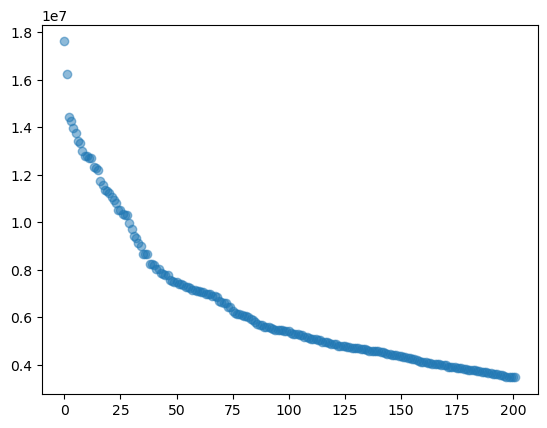

In [50]:
plt.scatter(sample1.index, sample1["Audi"], alpha = 0.5) 

### 감독별 평균 관람객수 컬럼 추가
- Audi_x : 누적관람객
- Audi_y : 감독의 평균관람객

In [64]:
sample2 = pd.merge(sample1, director_audi_avg, on = "Director")
sample3 = sample2.sort_values("Audi_x", ascending = False)
sample3

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi_x,Audi_y
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,10783828
3,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,16266338
4,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658,10202332
8,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478,12794797
10,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602,9468588
...,...,...,...,...,...,...,...,...,...,...
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257,3499257
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672,3477672
199,태풍,2005-12-14,"드라마,액션",15세관람가,한국,"필름,2D",곽경택,"이정재,이미연,장동건",3471150,3471150
200,킹콩,2005-12-14,"드라마,어드벤처",15세관람가,미국,필름,피터 잭슨,"잭 블랙,애드리언 브로디,나오미 왓츠",3470059,3470059


In [68]:
# Merge 이후로 꼬인 인덱스를 재조정

In [66]:
sample4 = sample3.reset_index(drop=True)
sample4

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi_x,Audi_y
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,10783828
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658,10202332
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478,12794797
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602,9468588
...,...,...,...,...,...,...,...,...,...,...
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257,3499257
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672,3477672
199,태풍,2005-12-14,"드라마,액션",15세관람가,한국,"필름,2D",곽경택,"이정재,이미연,장동건",3471150,3471150
200,킹콩,2005-12-14,"드라마,어드벤처",15세관람가,미국,필름,피터 잭슨,"잭 블랙,애드리언 브로디,나오미 왓츠",3470059,3470059


In [67]:
# 병합 확인

In [69]:
sample4[sample4['Director'] == "정지영"]

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi_x,Audi_y
201,부러진 화살,2012-01-18,드라마,15세이상관람가,한국,"필름,2D",정지영,"안성기,박원상,나영희,김지호,신종훈",3460212,3460212


In [70]:
sample4[sample4['Director'] == "김한민"]

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi_x,Audi_y
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,10783828
50,최종병기 활,2011-08-10,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"박해일,류승룡,김무열,문채원",7470633,10783828
54,한산: 용의 출현,2022-07-27,"액션,드라마",12세이상관람가,한국,"2D,4D,IMAX,ScreenX",김한민,"박해일,변요한,안성기,손현주,김성규,김성균,김향기,옥택연,공명,박지환,조재윤,김효주",7264934,10783828


### 감독의 평균관람객수와 순위의 산점도

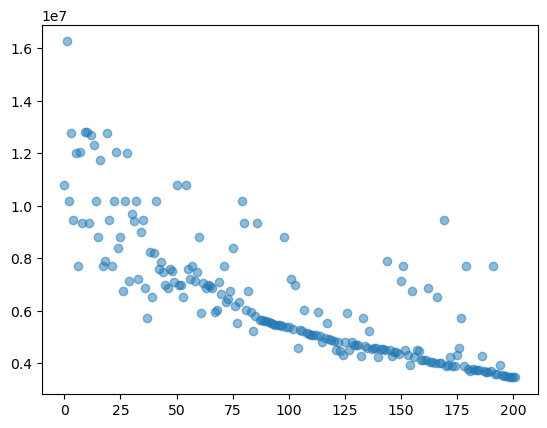

In [102]:
plt.scatter(sample4.index, sample4["Audi_y"], alpha = 0.5) 

### 누적관람객수가 정규분포인지 확인

(array([17., 20., 12., 17., 16., 12., 11., 11.,  4.,  7.,  2.,  5.,  9.,
         8.,  4.,  4.,  5.,  0.,  3.,  1.,  2.,  1.,  2.,  0.,  5.,  1.,
         2.,  3.,  1.,  1.,  1.,  2.,  3.,  2.,  1.,  1.,  1.,  1.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 3460212.  ,  3743326.14,  4026440.28,  4309554.42,  4592668.56,
         4875782.7 ,  5158896.84,  5442010.98,  5725125.12,  6008239.26,
         6291353.4 ,  6574467.54,  6857581.68,  7140695.82,  7423809.96,
         7706924.1 ,  7990038.24,  8273152.38,  8556266.52,  8839380.66,
         9122494.8 ,  9405608.94,  9688723.08,  9971837.22, 10254951.36,
        10538065.5 , 10821179.64, 11104293.78, 11387407.92, 11670522.06,
        11953636.2 , 12236750.34, 12519864.48, 12802978.62, 13086092.76,
        13369206.9 , 13652321.04, 13935435.18, 14218549.32, 14501663.46,
        14784777.6 , 15067891.74, 15351005.88, 15634120.02, 15917234.16,
        16200348.3 , 16483462.44, 16766576.58, 17049690.72,

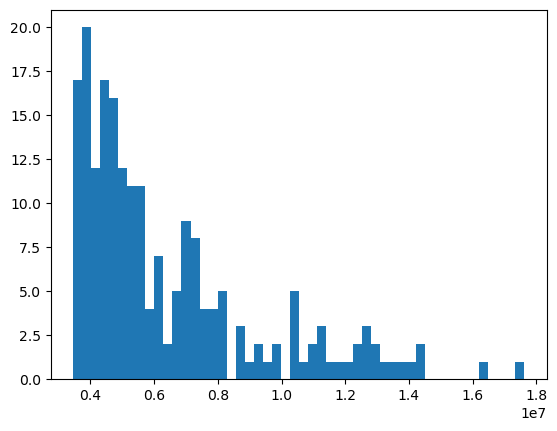

In [74]:
plt.hist(sample4["Audi_x"], bins=50) # 히스토그램만봐도 정규분포는 아닌 것으로 보인다..

#### 샘플링을 통해 정규분포에 가까운지 알아보자

In [76]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = sample4["Audi_x"].sample(30).mean()
    sample_means.append(m)

(array([ 5.,  4.,  9., 11., 27., 29., 37., 47., 52., 50., 70., 65., 80.,
        63., 74., 71., 53., 56., 41., 45., 34., 15., 15., 16., 17.,  7.,
         4.,  1.,  0.,  2.]),
 array([5163310.16666667, 5257609.50444444, 5351908.84222222,
        5446208.18      , 5540507.51777778, 5634806.85555556,
        5729106.19333333, 5823405.53111111, 5917704.86888889,
        6012004.20666667, 6106303.54444444, 6200602.88222222,
        6294902.22      , 6389201.55777778, 6483500.89555556,
        6577800.23333333, 6672099.57111111, 6766398.90888889,
        6860698.24666667, 6954997.58444444, 7049296.92222222,
        7143596.26      , 7237895.59777778, 7332194.93555555,
        7426494.27333333, 7520793.61111111, 7615092.94888889,
        7709392.28666667, 7803691.62444444, 7897990.96222222,
        7992290.3       ]),
 <BarContainer object of 30 artists>)

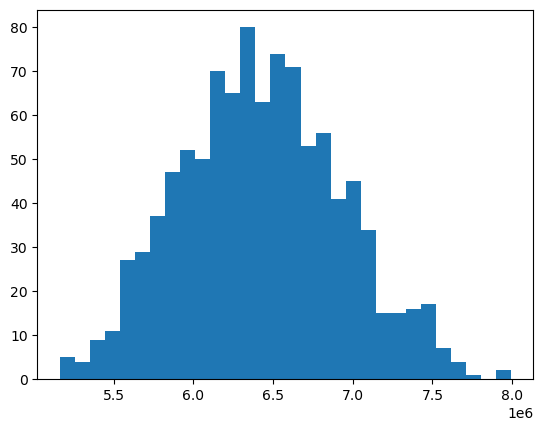

In [77]:
plt.hist(sample_means, bins = 30) # 샘플링으로 봤을 때 정규분포에 가깝다.

#### 샘플링의 크기와 정확도 테스트

- 샘플링의 평균값과 sample4["Audi_x"]의 평균값 비교

In [78]:
np.mean(sample_means)

6425688.596

In [79]:
sample4["Audi_x"].mean()

6429580.193069307

In [81]:
# 놀랍도록 비슷하므로 신뢰도 up
# Audi_x는 정규분포이다

### 감독별 평균관람객수가 정규분포인지 확인

(array([12., 14.,  9., 13., 18.,  8.,  9.,  9., 11.,  8.,  2.,  3.,  8.,
        11.,  9.,  3., 11.,  3.,  2.,  2.,  4.,  1.,  0.,  9.,  1.,  0.,
         7.,  0.,  3.,  0.,  0.,  0.,  1.,  4.,  1.,  0.,  5.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3460212.  ,  3716334.52,  3972457.04,  4228579.56,  4484702.08,
         4740824.6 ,  4996947.12,  5253069.64,  5509192.16,  5765314.68,
         6021437.2 ,  6277559.72,  6533682.24,  6789804.76,  7045927.28,
         7302049.8 ,  7558172.32,  7814294.84,  8070417.36,  8326539.88,
         8582662.4 ,  8838784.92,  9094907.44,  9351029.96,  9607152.48,
         9863275.  , 10119397.52, 10375520.04, 10631642.56, 10887765.08,
        11143887.6 , 11400010.12, 11656132.64, 11912255.16, 12168377.68,
        12424500.2 , 12680622.72, 12936745.24, 13192867.76, 13448990.28,
        13705112.8 , 13961235.32, 14217357.84, 14473480.36, 14729602.88,
        14985725.4 , 15241847.92, 15497970.44, 15754092.96,

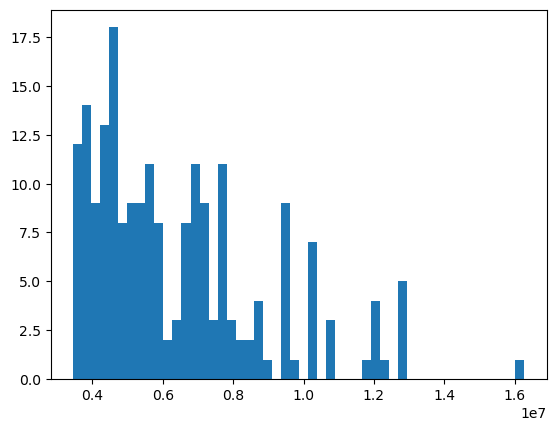

In [82]:
plt.hist(sample4["Audi_y"], bins=50)

#### 샘플링을 통한 정규분포 확인

In [83]:
np.random.seed(42)
sample_means2 = []
for _ in range(1000):
    m = sample4["Audi_y"].sample(30).mean()
    sample_means2.append(m)

(array([ 3.,  7.,  6., 14.,  8., 29., 41., 51., 63., 70., 60., 58., 79.,
        76., 60., 85., 66., 61., 41., 35., 22., 15., 20., 11.,  9.,  4.,
         2.,  2.,  0.,  2.]),
 array([5302016.33333333, 5387197.45222222, 5472378.57111111,
        5557559.69      , 5642740.80888889, 5727921.92777778,
        5813103.04666667, 5898284.16555556, 5983465.28444444,
        6068646.40333333, 6153827.52222222, 6239008.64111111,
        6324189.76      , 6409370.87888889, 6494551.99777778,
        6579733.11666667, 6664914.23555556, 6750095.35444444,
        6835276.47333333, 6920457.59222222, 7005638.71111111,
        7090819.83      , 7176000.94888889, 7261182.06777778,
        7346363.18666667, 7431544.30555556, 7516725.42444444,
        7601906.54333333, 7687087.66222222, 7772268.78111111,
        7857449.9       ]),
 <BarContainer object of 30 artists>)

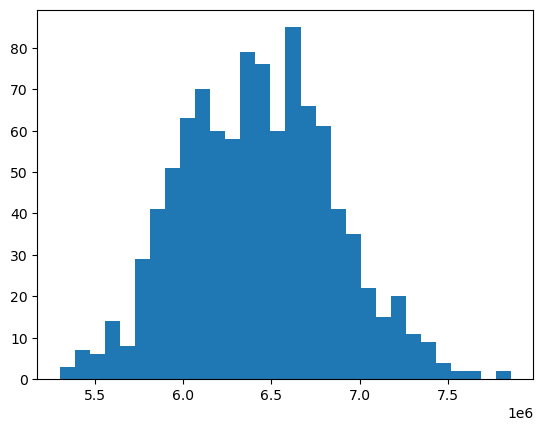

In [84]:
plt.hist(sample_means2, bins = 30)

#### 샘플링의 크기와 정확도 테스트

- 샘플링의 평균값과 sample4["Audi_y"]의 평균값 비교
- 사실 Audi_y는 Audi_x에서 값을 가져왔기 때문에 비슷할 수 밖에 없다

In [85]:
np.mean(sample_means2)

6425722.2435

In [86]:
sample4["Audi_y"].mean()

6429580.029702971

## 가설 검정

- 귀무가설 : 표본 사이에 통계적으로 의미가 없다고 예상되는 가설
- 대립가설 : 표본 사이에 통계적인 차이가 있다는 가설

In [87]:
from scipy import stats

In [90]:
t, pvalue = stats.ttest_ind(sample4["Audi_x"], sample4["Audi_y"])
print(t, pvalue)

6.062865130721037e-07 0.9999995165540954


### pvalue가 0.999이므로 귀무가설을 기각한다

### 평균관람객수와 누적관람객수는 관계가 크다

### 만약 정규분포가 아니라면???

- 순열 검정 : 모집단의 분포가 정규분포를 따르지 않거나 모집단의 분포를 알 수 없을 때 사용하는 방법
- 모집단의 파라미터를 추정하지 않기 때문에 비모수검정 방법중에 하나

In [98]:
res = stats.permutation_test((sample4["Audi_x"], sample4["Audi_y"]), statistic, random_state=42)

In [99]:
print(res.statistic, res.pvalue)

0.16336633637547493 0.9912


### pvalue가 0.999이므로 귀무가설을 기각한다.

### 평균관람객수와 누적관람객수는 관계가 크다

In [103]:
# 순위와 누적관람객수 or 순위와 평균관람객수의 차이는 상담필요